In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('US_counties_COVID19_health_weather_data.csv')


**Features Investigating**

In [4]:
#drop preagreed columns, fips is identifier and deaths is something we are not concerened with at the moment
df.drop(columns=['fips', 'deaths'], inplace=True)

df.columns[114:171]

Index(['percent_less_than_18_years_of_age', 'percent_65_and_over', 'num_black',
       'percent_black', 'num_american_indian_alaska_native',
       'percent_american_indian_alaska_native', 'num_asian', 'percent_asian',
       'num_native_hawaiian_other_pacific_islander',
       'percent_native_hawaiian_other_pacific_islander', 'num_hispanic',
       'percent_hispanic', 'num_non_hispanic_white',
       'percent_non_hispanic_white', 'num_not_proficient_in_english',
       'percent_not_proficient_in_english', 'percent_female', 'num_rural',
       'percent_rural', 'num_housing_units', 'num_households_CDC',
       'num_below_poverty', 'num_unemployed_CDC', 'per_capita_income',
       'num_no_highschool_diploma', 'num_age_65_and_older',
       'num_age_17_and_younger', 'num_disabled',
       'num_single_parent_households_CDC', 'num_minorities',
       'num_limited_english_abilities', 'num_multi_unit_housing',
       'num_mobile_homes', 'num_overcrowding',
       'num_households_with_no_vehic

In [3]:
check = df[df['county'] == 'Steuben']
check = check[check['state'] == 'New York']

In [14]:
check

,date,county,state,cases,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
6651,2020-03-21,Steuben,New York,2,yes,no,42.267818,-77.38379,98151.0,1390.572476,...,27.966667,31.38,31.10,29.466667,26.600000,29.66,30.27,28.426667,2020-03-20,2020-03-22
7729,2020-03-22,Steuben,New York,3,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,24.233333,29.58,29.61,29.333333,18.833333,27.90,30.72,30.000000,2020-03-20,2020-03-22
8909,2020-03-23,Steuben,New York,4,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,25.633333,27.96,30.62,29.600000,22.666667,23.94,31.75,31.460000,2020-03-20,2020-03-22
10196,2020-03-24,Steuben,New York,5,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,32.666667,27.40,29.41,31.006667,30.400000,26.76,32.24,33.166667,2020-03-20,2020-03-22
11607,2020-03-25,Steuben,New York,8,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,31.066667,30.04,28.60,30.800000,32.500000,32.38,31.05,33.273333,2020-03-20,2020-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776104,2020-11-30,Steuben,New York,1797,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,24.666667,27.38,NaN,NaN,33.466667,32.54,NaN,NaN,2020-03-20,2020-03-22
779324,2020-12-01,Steuben,New York,1824,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,28.333333,26.60,NaN,NaN,34.266667,29.48,NaN,NaN,2020-03-20,2020-03-22
782544,2020-12-02,Steuben,New York,1865,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,30.333333,30.60,NaN,NaN,28.266667,27.50,NaN,NaN,2020-03-20,2020-03-22
785764,2020-12-03,Steuben,New York,1898,yes,yes,42.267818,-77.38379,98151.0,1390.572476,...,33.333333,NaN,NaN,NaN,20.666667,NaN,NaN,NaN,2020-03-20,2020-03-22


<Axes: xlabel='date'>

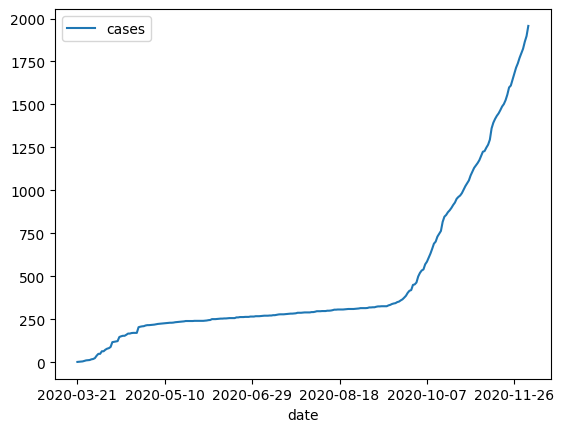

In [4]:
check.plot(x='date', y='cases')

In [5]:
subset = df.iloc[:, 114:171]
subset2 = df.iloc[:, [1,2]]
workingDF = pd.concat([subset2, subset], axis=1)

In [6]:
workingDF['countyID'] = workingDF['county'] + workingDF['state']
workingDF.drop(columns=['county', 'state'], inplace=True)

In [56]:
#for these variables it seems that the same number of na values are present in each column, meaning that they probably are all the same rows with the exception of num_rural and percent_rural
workingDF.isna().sum()

percent_less_than_18_years_of_age                 17835
percent_65_and_over                               17835
num_black                                         17835
percent_black                                     17835
num_american_indian_alaska_native                 17835
percent_american_indian_alaska_native             17835
num_asian                                         17835
percent_asian                                     17835
num_native_hawaiian_other_pacific_islander        17835
percent_native_hawaiian_other_pacific_islander    17835
num_hispanic                                      17835
percent_hispanic                                  17835
num_non_hispanic_white                            17835
percent_non_hispanic_white                        17835
num_not_proficient_in_english                     17835
percent_not_proficient_in_english                 17835
percent_female                                    17835
num_rural                                       

In [7]:
#looking at the na rows, it apperas that it is puerto rico, the virgin islands, parts of alaska, and missouri that are missing this data
#i think that we can drop these rows as since it primarily deals with us territories, their socioeconoimc data is much more harder to come by
narows = workingDF[workingDF.isna().any(axis=1)]
narows.countyID.unique()

array(['Petersburg BoroughAlaska', 'St. CroixVirgin Islands',
       'St. JohnVirgin Islands', 'St. ThomasVirgin Islands',
       'Oglala LakotaSouth Dakota',
       'Prince of Wales-Hyder Census AreaAlaska', 'AdjuntasPuerto Rico',
       'AguadaPuerto Rico', 'AguadillaPuerto Rico',
       'Aguas BuenasPuerto Rico', 'AibonitoPuerto Rico',
       'AnascoPuerto Rico', 'AreciboPuerto Rico', 'ArroyoPuerto Rico',
       'BarcelonetaPuerto Rico', 'BarranquitasPuerto Rico',
       'BayamonPuerto Rico', 'Cabo RojoPuerto Rico', 'CaguasPuerto Rico',
       'CamuyPuerto Rico', 'CanovanasPuerto Rico', 'CarolinaPuerto Rico',
       'CatanoPuerto Rico', 'CayeyPuerto Rico', 'CeibaPuerto Rico',
       'CialesPuerto Rico', 'CidraPuerto Rico', 'CoamoPuerto Rico',
       'ComerioPuerto Rico', 'CorozalPuerto Rico', 'DoradoPuerto Rico',
       'FajardoPuerto Rico', 'FloridaPuerto Rico', 'GuanicaPuerto Rico',
       'GuayamaPuerto Rico', 'GuayanillaPuerto Rico',
       'GuaynaboPuerto Rico', 'GuraboPuerto R

In [9]:
len(narows.countyID.unique())

90

In [68]:
#looking at the differences, we see that it is parts of alaska and one county in south dakota that do not report the number of rural people
#i think that we can just drop these rows as in the grand scheme of things, it is only six counties 

notRurals = workingDF[workingDF.num_black.isna()].countyID.unique()
print(set(narows.countyID.unique()).difference(set(notRurals)))

{'Oglala LakotaSouth Dakota', 'Kusilvak Census AreaAlaska', 'Petersburg BoroughAlaska', 'Skagway MunicipalityAlaska', 'Prince of Wales-Hyder Census AreaAlaska', 'Wrangell City and BoroughAlaska'}


Ultimately, I think that since any of the rows with missing values are missing all of the values in terms of the predictor columns, and these rows are from places where data seems to be sparse, we should just use .dropna() on these rows